C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_21704\3533927952.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_21704\3533927952.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_21704\3533927952.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_21704\3533927952.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or us

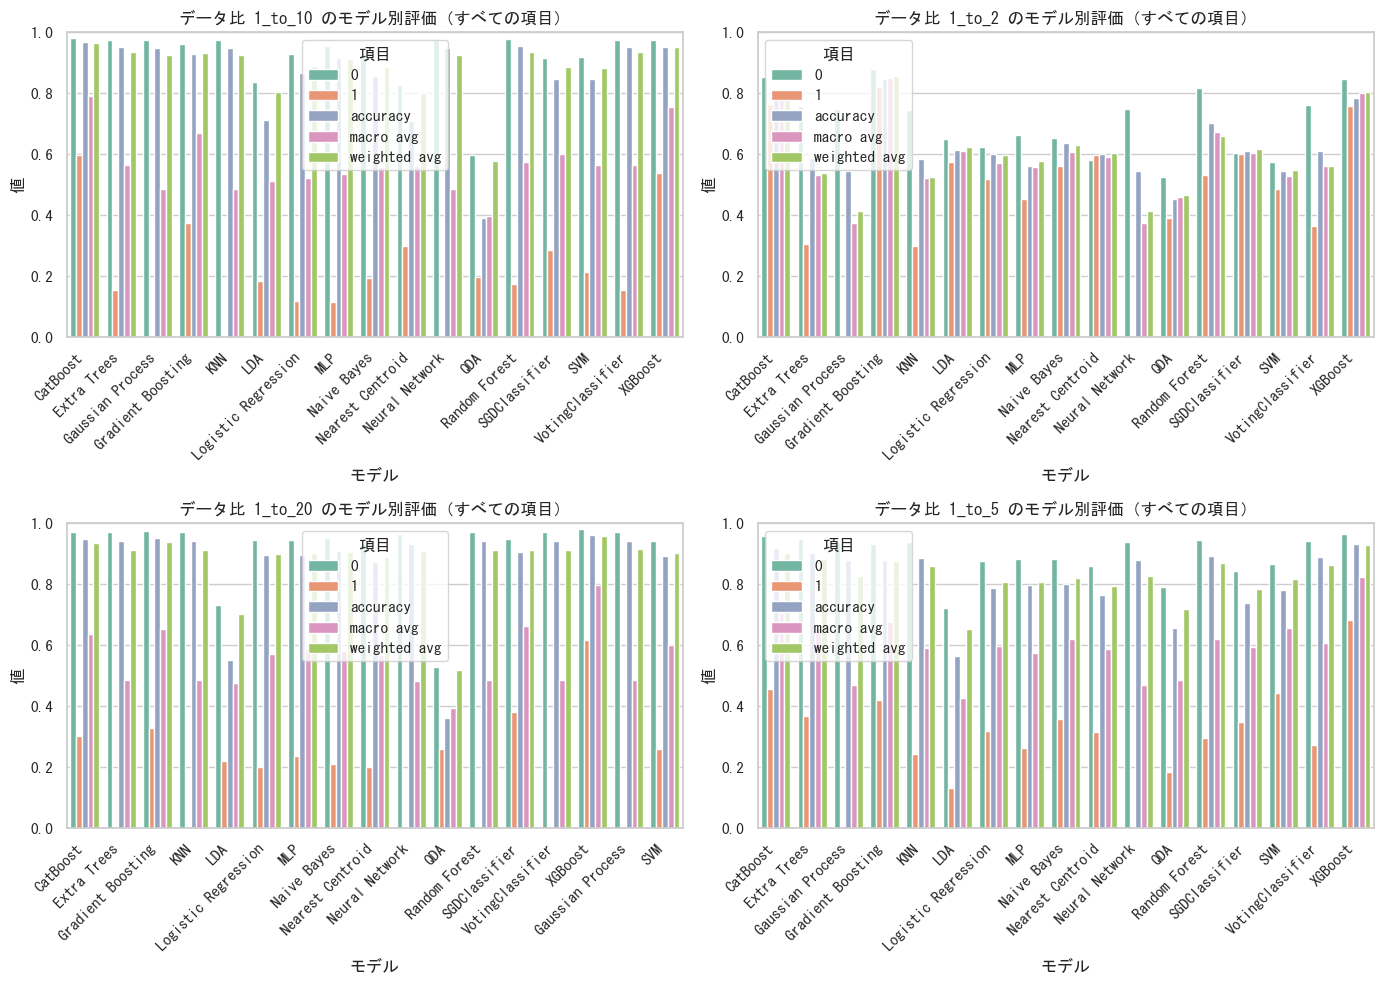

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 日本語フォント対応（必要なら 'MS Gothic' から他のフォントへ変更）
plt.rcParams['font.family'] = 'MS Gothic'

# ファイル読み込み（インデックス処理）
df = pd.read_csv("results_summary/全モデル評価結果_比率別まとめ.csv", index_col=0)
df = df.reset_index().rename(columns={'Unnamed: 0': '項目'})

# メトリクス列の定義
metrics = ['precision', 'recall', 'f1-score']

# melt処理（項目の絞り込みなし）
df_melted = df.melt(
    id_vars=['モデル', 'データ比', '構成', '項目'],
    value_vars=metrics,
    var_name='メトリック',
    value_name='値'
)

# データ比の種類取得
unique_ratios = df_melted['データ比'].dropna().unique()

# 描画
if len(unique_ratios) == 0:
    print("⚠️ データ比列が空です。CSVの中身を確認してください。")
else:
    cols = 2
    rows = math.ceil(len(unique_ratios) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
    axes = axes.flatten()

    for idx, ratio in enumerate(sorted(unique_ratios)):
        ax = axes[idx]
        subset = df_melted[df_melted['データ比'] == ratio]
        sns.barplot(
            data=subset,
            x='モデル',
            y='値',
            hue='項目',  # 「非倒産」「倒産」「macro avg」などすべて含む
            palette='Set2',
            errorbar=None,
            ax=ax
        )
        ax.set_title(f"データ比 {ratio} のモデル別評価（すべての項目）")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylim(0, 1)
        ax.legend(title='項目')

    plt.tight_layout()
    plt.show()


In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'  # Windowsの場合

In [22]:
df

,項目,precision,recall,f1-score,support,accuracy,構成,モデル,データ比
0,0,0.967914,1.000000,0.983696,181.000000,0.968421,Combined,CatBoost,1_to_10
1,1,1.000000,0.333333,0.500000,9.000000,0.968421,Combined,CatBoost,1_to_10
2,accuracy,0.968421,0.968421,0.968421,0.968421,0.968421,Combined,CatBoost,1_to_10
3,macro avg,0.983957,0.666667,0.741848,190.000000,0.968421,Combined,CatBoost,1_to_10
4,weighted avg,0.969434,0.968421,0.960784,190.000000,0.968421,Combined,CatBoost,1_to_10
...,...,...,...,...,...,...,...,...,...
1005,0,0.947368,1.000000,0.972973,18.000000,0.950000,Standalone,XGBoost,1_to_5
1006,1,1.000000,0.500000,0.666667,2.000000,0.950000,Standalone,XGBoost,1_to_5
1007,accuracy,0.950000,0.950000,0.950000,0.950000,0.950000,Standalone,XGBoost,1_to_5
1008,macro avg,0.973684,0.750000,0.819820,20.000000,0.950000,Standalone,XGBoost,1_to_5


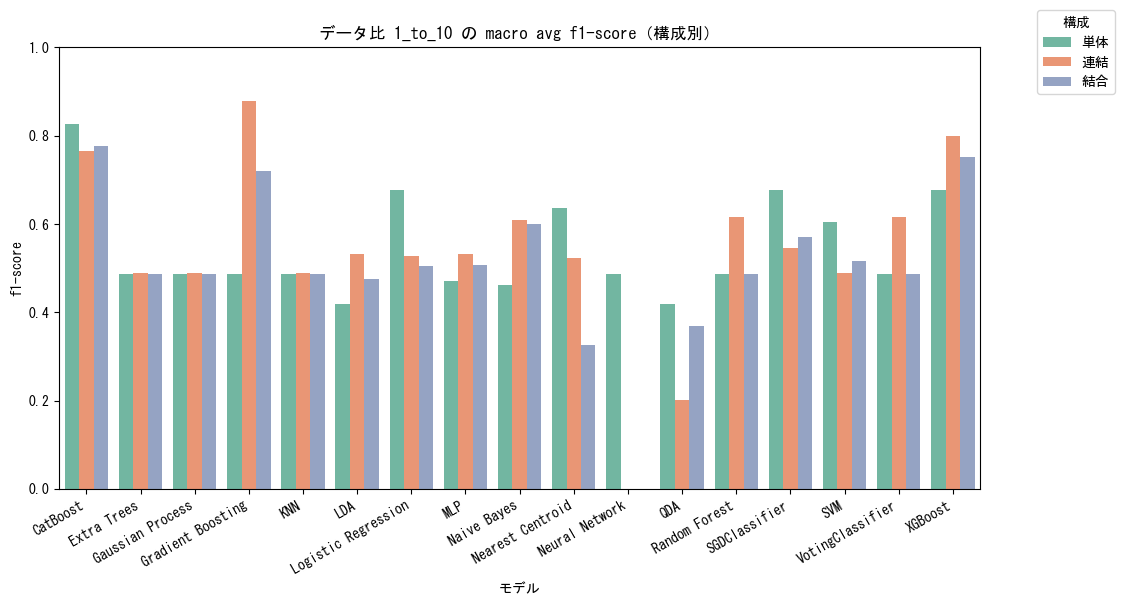

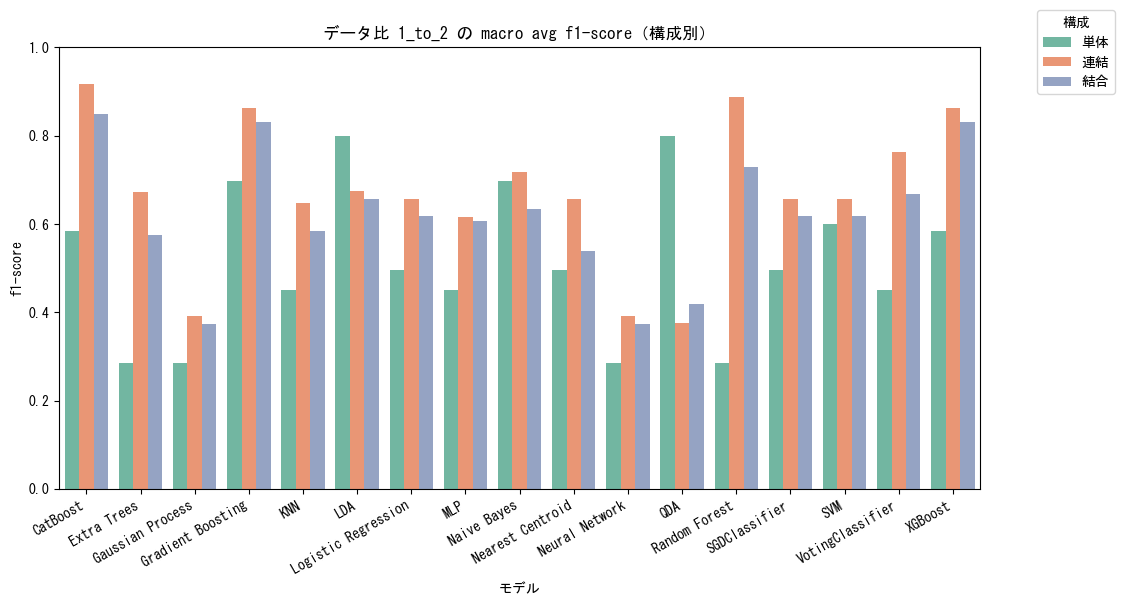

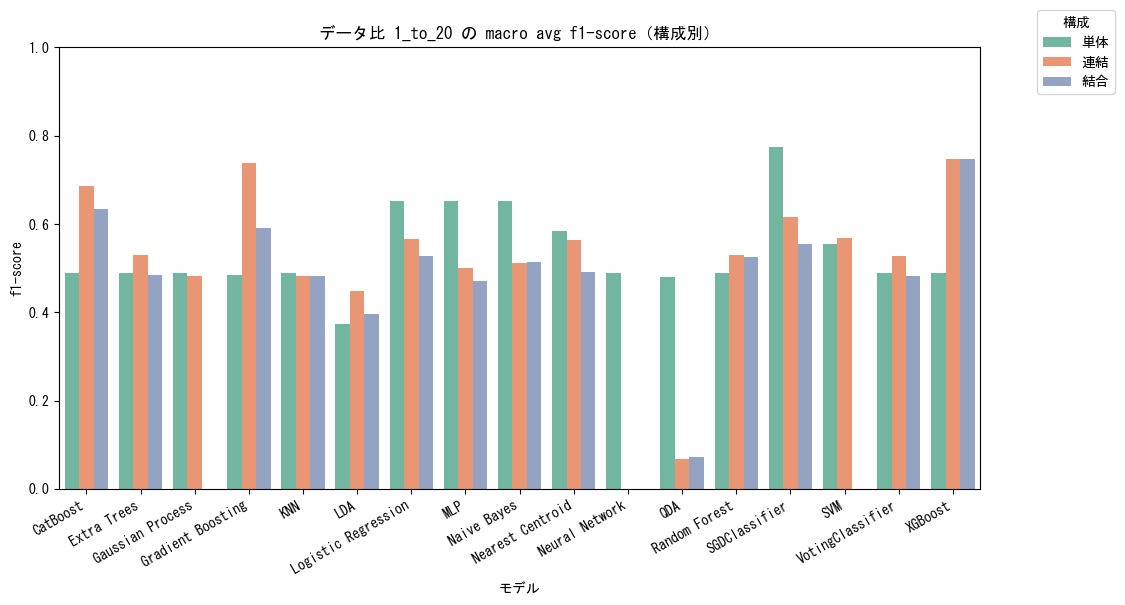

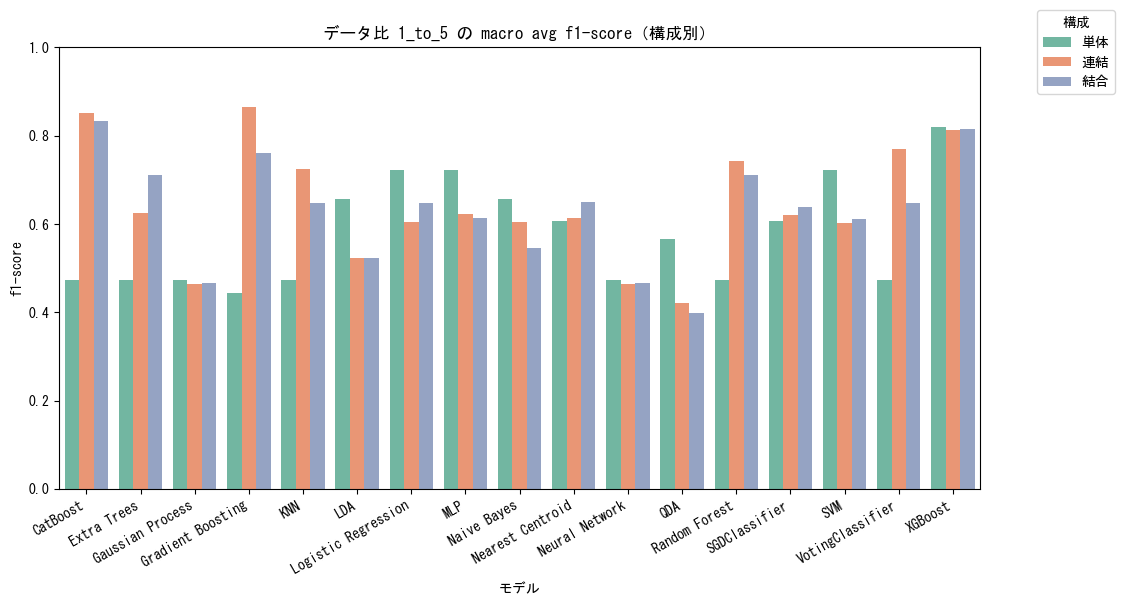

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォント
plt.rcParams['font.family'] = 'MS Gothic'

# ファイル読み込み
df = pd.read_csv("results_summary/全モデル評価結果_比率別まとめ.csv", encoding='utf-8-sig')

# 項目をインデックスから戻す
if '項目' not in df.columns:
    df.reset_index(inplace=True)

# 項目変換
df['項目'] = df['項目'].replace({0: '非倒産', 1: '倒産'})

# melt処理
metrics = ['precision', 'recall', 'f1-score']
df_melted = df.melt(
    id_vars=['モデル', 'データ比', '構成', '項目'],
    value_vars=metrics,
    var_name='メトリック',
    value_name='値'
)

# macro avg の f1-score 抽出
subset_macro_f1 = df_melted[
    (df_melted['項目'] == 'macro avg') &
    (df_melted['メトリック'] == 'f1-score')
].copy()

# モデル×構成×データ比 の補完（値=0.0）
all_ratios = sorted(df['データ比'].dropna().unique())
all_models = sorted(df['モデル'].dropna().unique())
all_structures = ['単体', '連結', '結合']

complete_data = []
for ratio in all_ratios:
    for model in all_models:
        for structure in all_structures:
            if not ((subset_macro_f1['モデル'] == model) &
                    (subset_macro_f1['データ比'] == ratio) &
                    (subset_macro_f1['構成'] == structure)).any():
                complete_data.append({
                    'モデル': model,
                    'データ比': ratio,
                    '構成': structure,
                    '項目': 'macro avg',
                    'メトリック': 'f1-score',
                    '値': 0.0
                })

subset_macro_f1 = pd.concat([subset_macro_f1, pd.DataFrame(complete_data)], ignore_index=True)

# グラフを1枚ずつ描画
for ratio in all_ratios:
    plot_data = subset_macro_f1[subset_macro_f1['データ比'] == ratio]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        data=plot_data,
        x='モデル',
        y='値',
        hue='構成',
        hue_order=['単体', '連結', '結合'],  # ★順序を指定
        palette='Set2',
        ax=ax
    )

    ax.set_title(f"データ比 {ratio} の macro avg f1-score（構成別）")
    ax.tick_params(axis='x', labelrotation=30)  # ← ここで角度調整
    plt.setp(ax.get_xticklabels(), ha='right')  # ← 右揃えを指定
    ax.set_ylim(0, 1)
    ax.set_ylabel("f1-score")

    # まずsubplot側の凡例を削除
    ax.legend_.remove()

    # 外側に凡例を表示
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels, title='構成',
        loc='upper right', bbox_to_anchor=(1.12, 1), borderaxespad=0
    )

    plt.tight_layout()

    # グラフを保存（ファイル名にデータ比を含める）
    save_filename = f"macro_avg_f1score_{ratio}.png"
    plt.savefig(save_filename, bbox_inches='tight', dpi=300)

    plt.show()

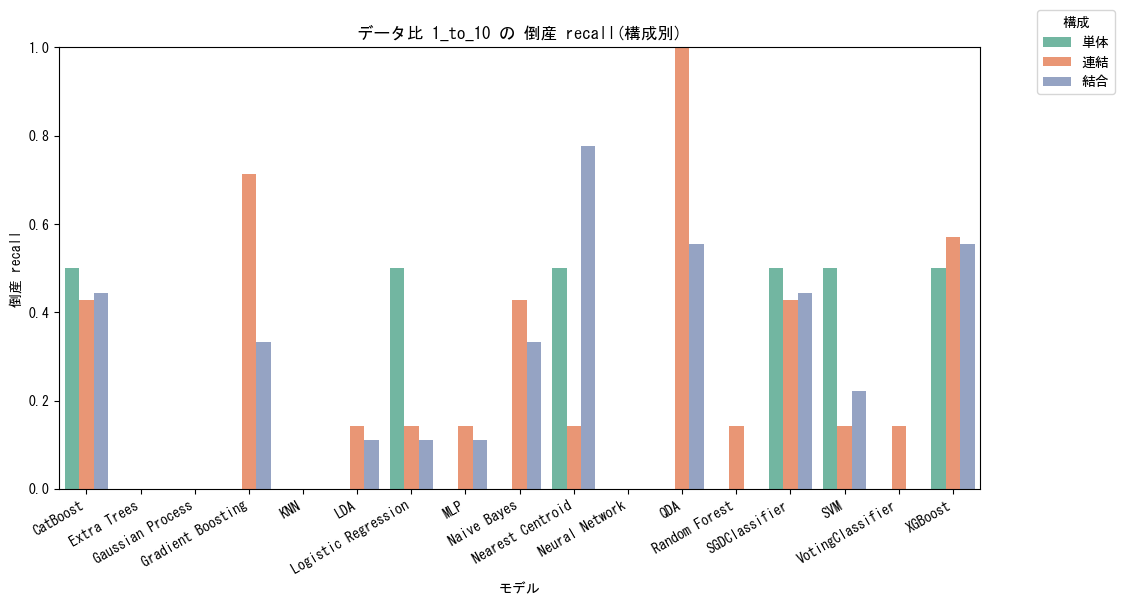

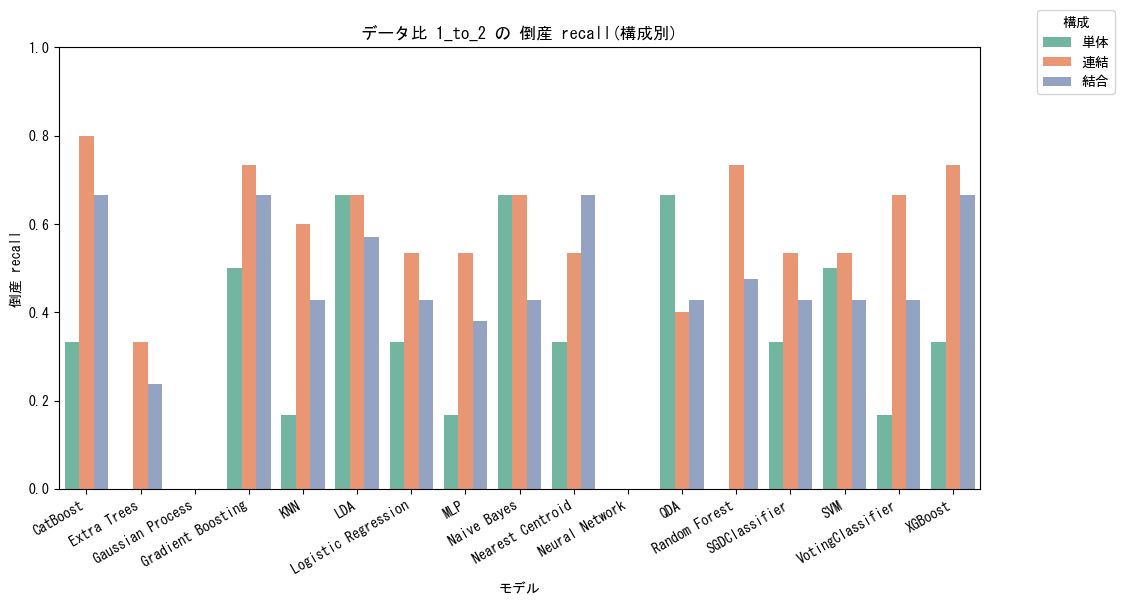

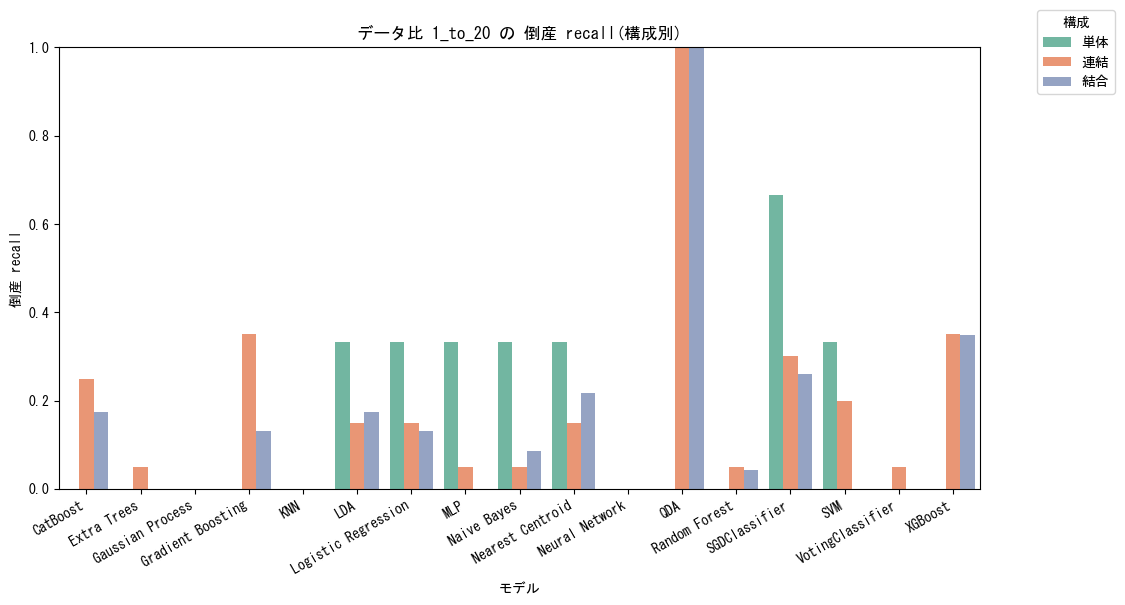

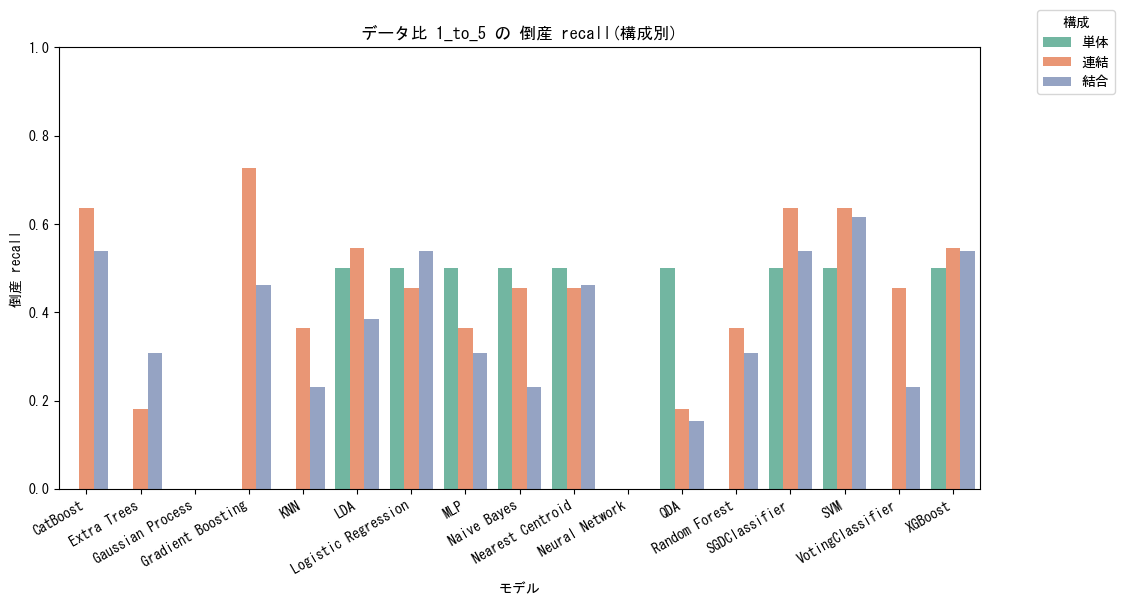

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォント
plt.rcParams['font.family'] = 'MS Gothic'

# ファイル読み込み
df = pd.read_csv("results_summary/全モデル評価結果_比率別まとめ.csv", encoding='utf-8-sig')

# 項目をインデックスから戻す
if '項目' not in df.columns:
    df.reset_index(inplace=True)

# 項目変換
#df['項目'] = df['項目'].replace({0: '非倒産', 1: '倒産'})

# melt処理
metrics = ['precision', 'recall', 'f1-score']
df_melted = df.melt(
    id_vars=['モデル', 'データ比', '構成', '項目'],
    value_vars=metrics,
    var_name='メトリック',
    value_name='値'
)

# 倒産 の recall を抽出
subset_recall_1 = df_melted[
    (df_melted['項目'] == '倒産') &
    (df_melted['メトリック'] == 'recall')
].copy()

# モデル×構成×データ比 の補完（値=0.0）
all_ratios = sorted(df['データ比'].dropna().unique())
all_models = sorted(df['モデル'].dropna().unique())
all_structures = ['単体', '連結', '結合']

#complete_data = []
#for ratio in all_ratios:
#    for model in all_models:
#        for structure in all_structures:
#            if not ((subset_recall_1['モデル'] == model) &
#                    (subset_recall_1['データ比'] == ratio) &
#                    (subset_recall_1['構成'] == structure)).any():
#                complete_data.append({
#                    'モデル': model,
#                    'データ比': ratio,
#                    '構成': structure,
#                    '項目': '倒産',
#                    'メトリック': 'recall',
#                    '値': 0.0
#                })

#subset_recall_1 = pd.concat([subset_recall_1, pd.DataFrame(complete_data)], ignore_index=True)

# グラフを1枚ずつ描画
for ratio in all_ratios:
    plot_data = subset_recall_1[subset_recall_1['データ比'] == ratio]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        data=plot_data,
        x='モデル',
        y='値',
        hue='構成',
        hue_order=['単体', '連結', '結合'],  # ★順序を指定
        palette='Set2',
        ax=ax
    )

    ax.set_title(f"データ比 {ratio} の 倒産 recall(構成別)")
    ax.tick_params(axis='x', labelrotation=30)
    plt.setp(ax.get_xticklabels(), ha='right')
    ax.set_ylim(0, 1)
    ax.set_ylabel("倒産 recall")

    # 凡例が存在する場合のみ削除
    legend = ax.get_legend()
    if legend:
        legend.remove()

    # 外側に凡例を表示
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels, title='構成',
        loc='upper right', bbox_to_anchor=(1.12, 1), borderaxespad=0
    )

    plt.tight_layout()

    save_filename = f"recall_insolvent_{ratio}.png"
    plt.savefig(save_filename, bbox_inches='tight', dpi=300)

    plt.show()


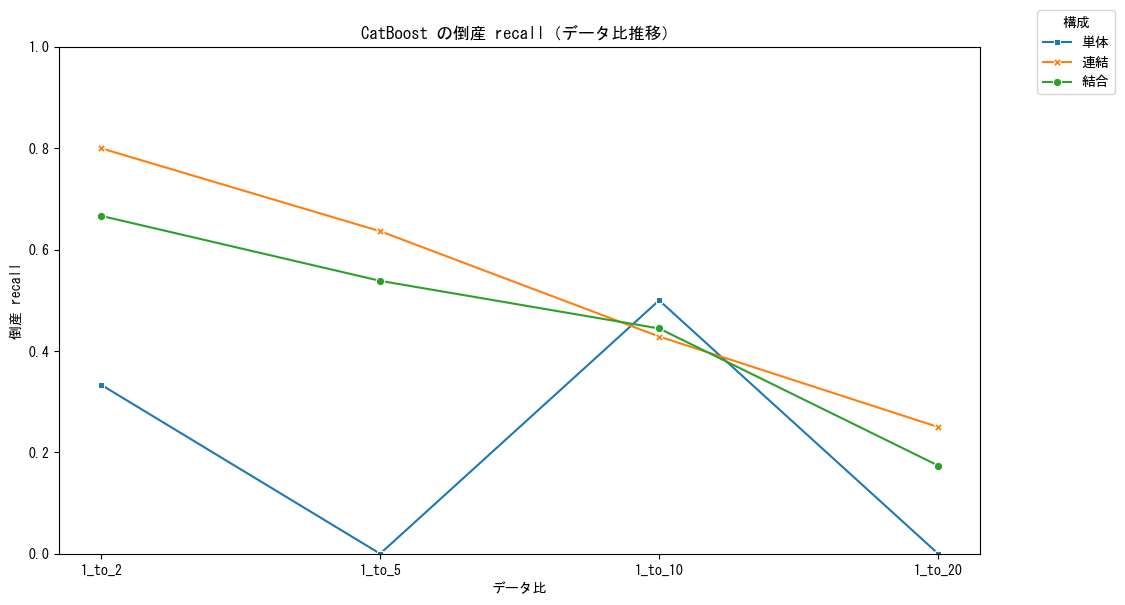

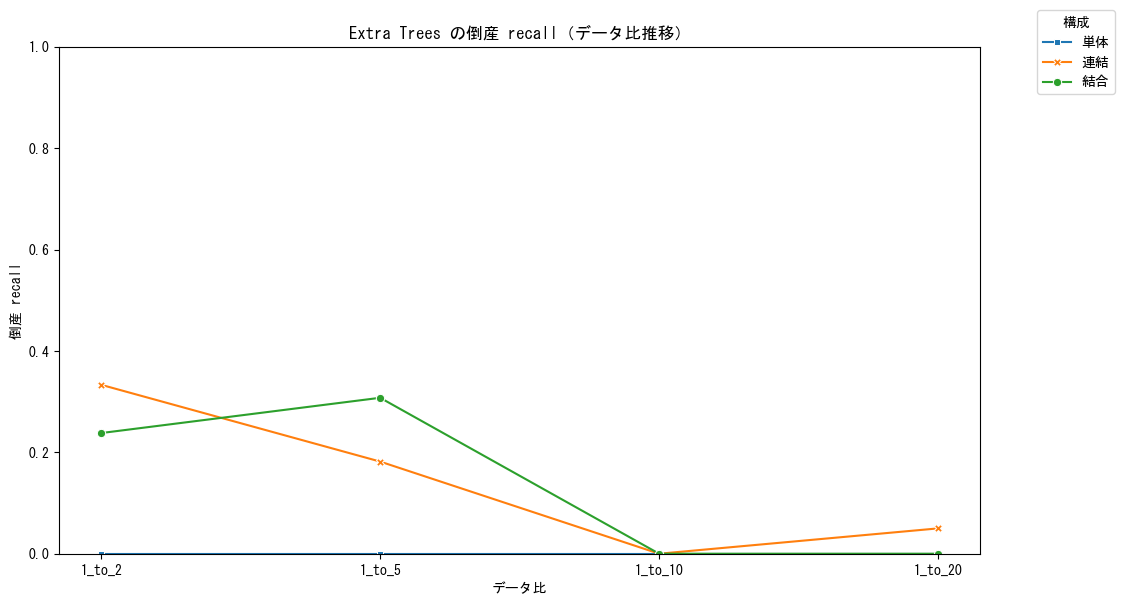

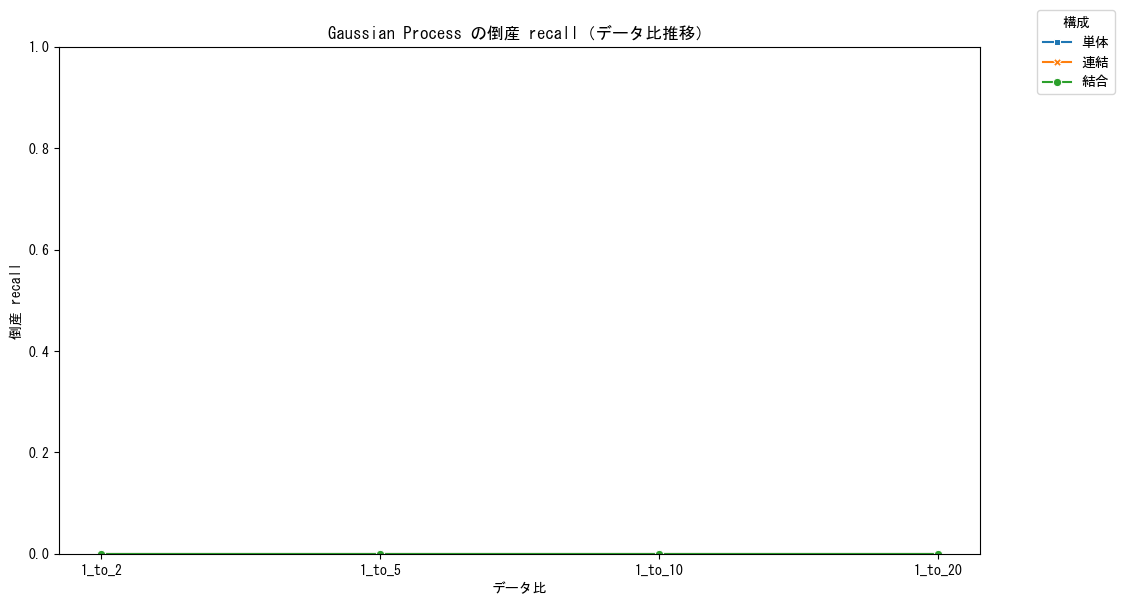

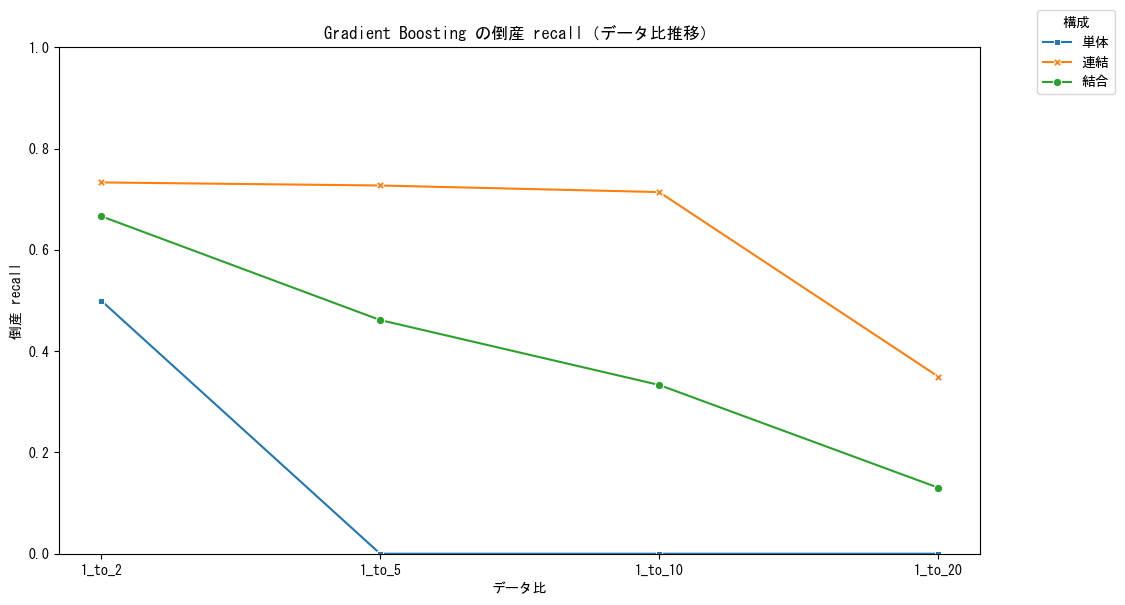

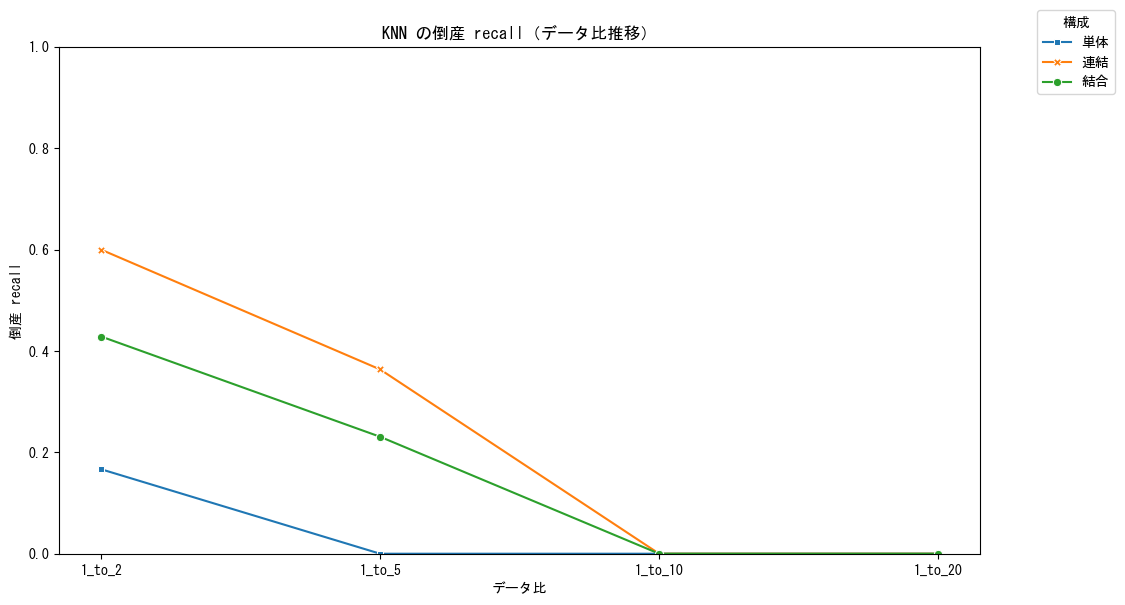

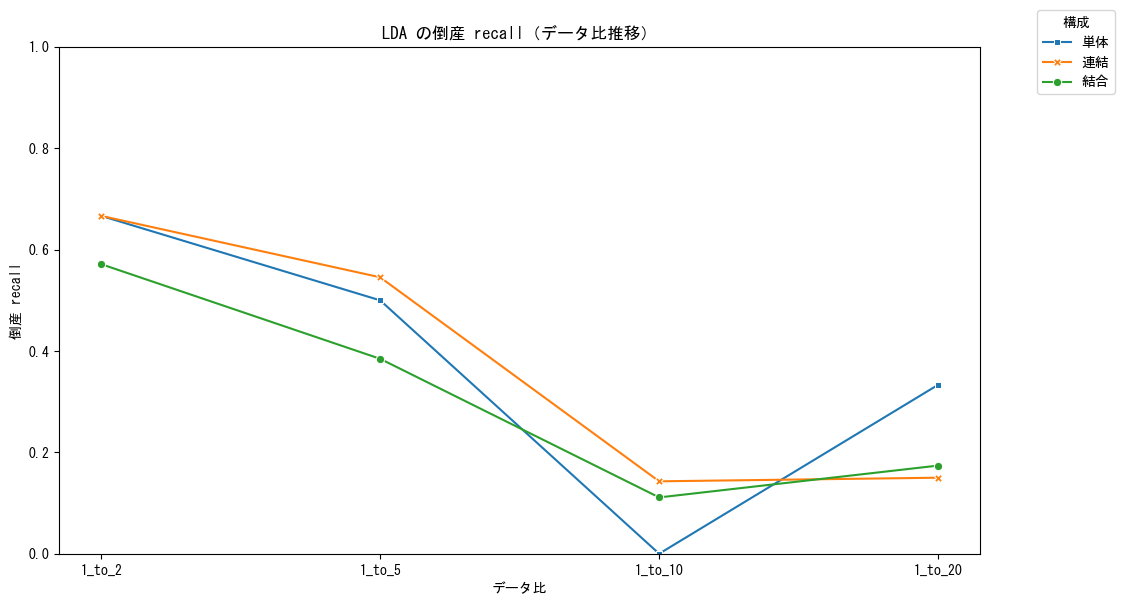

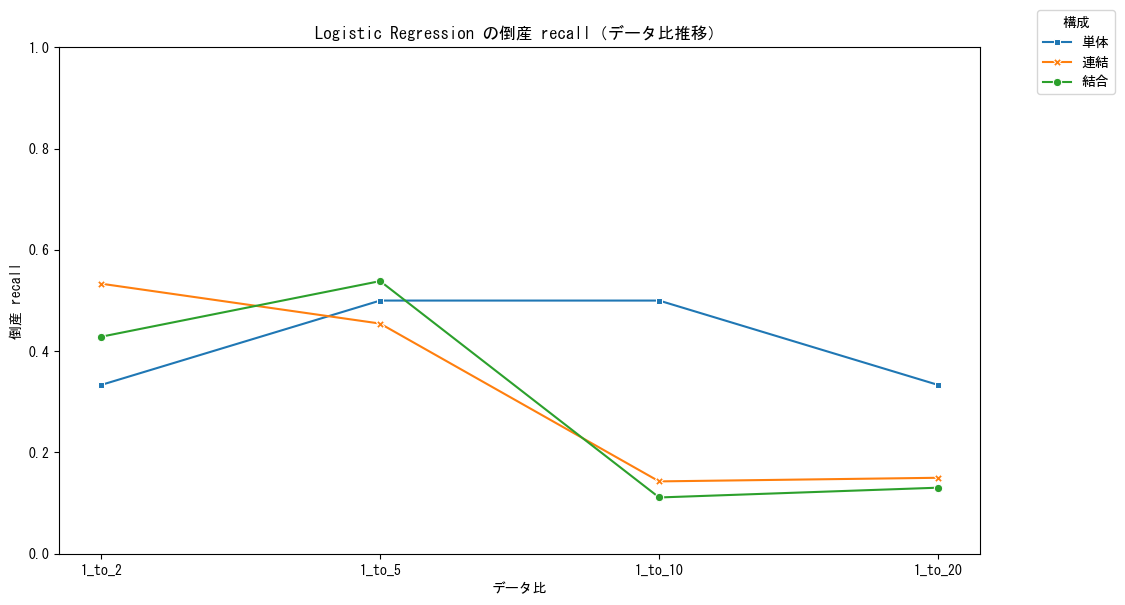

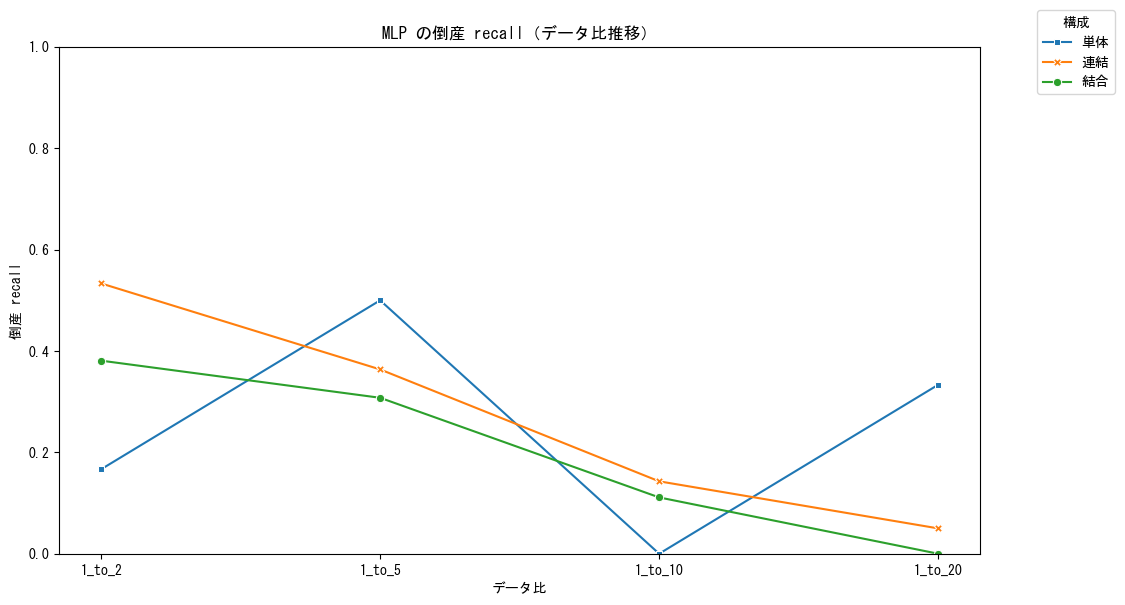

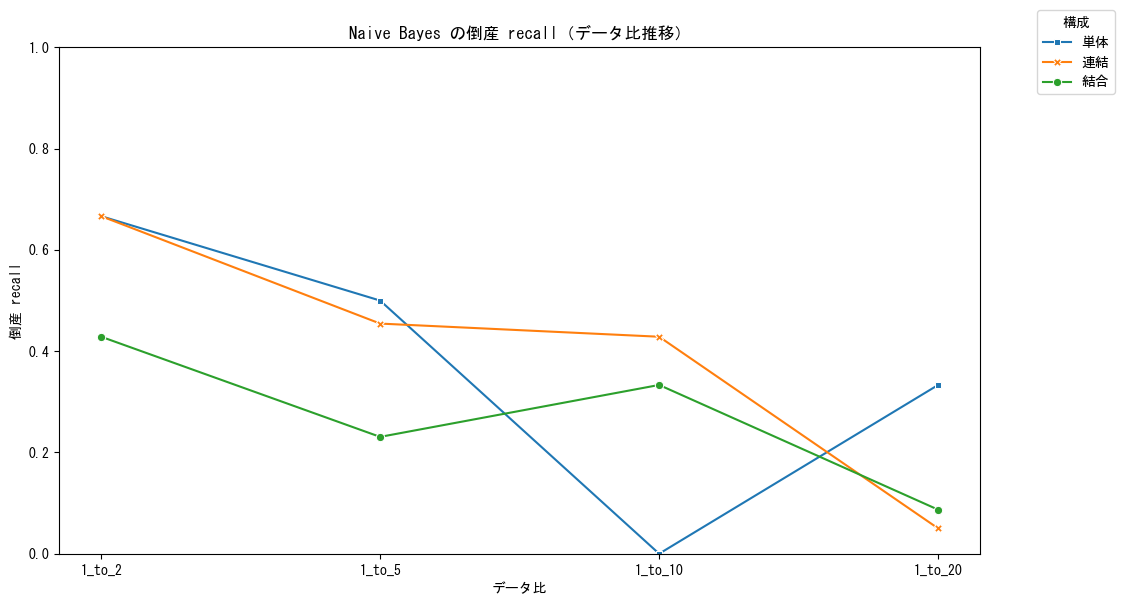

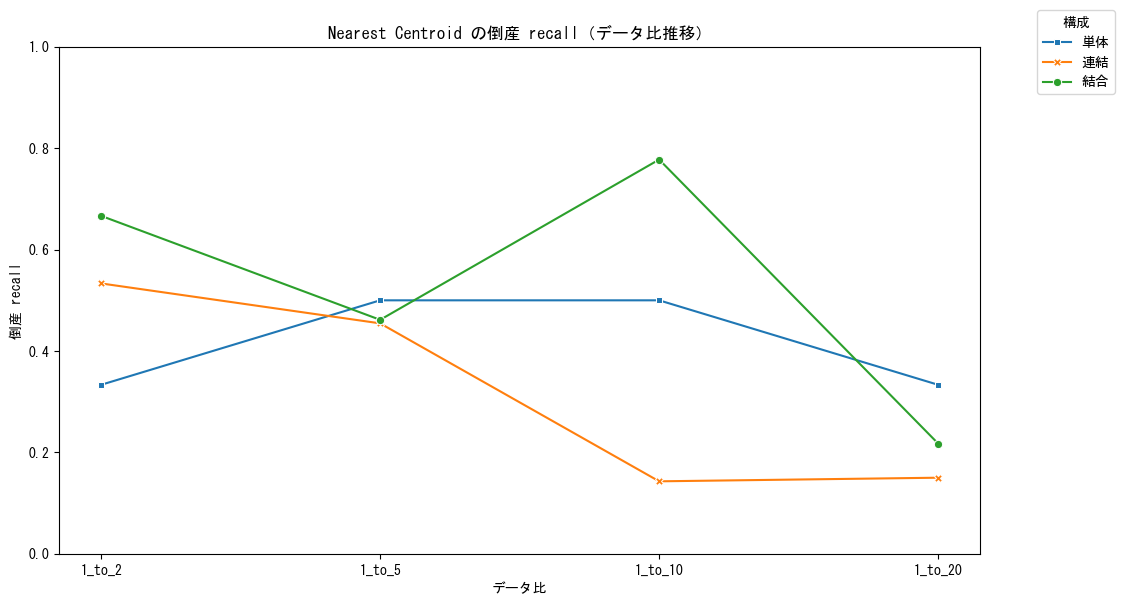

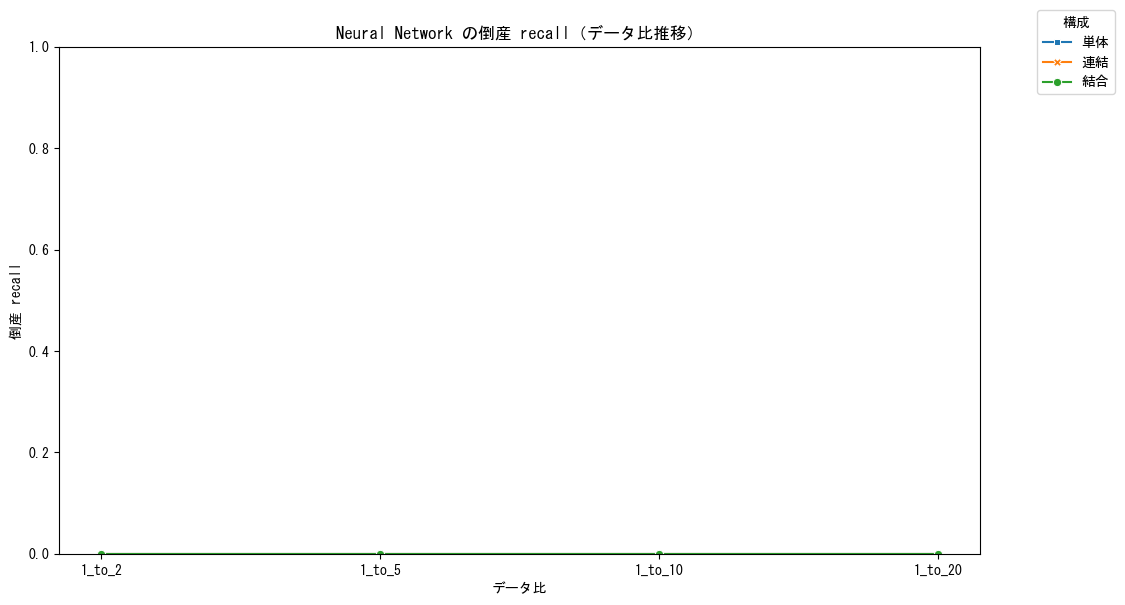

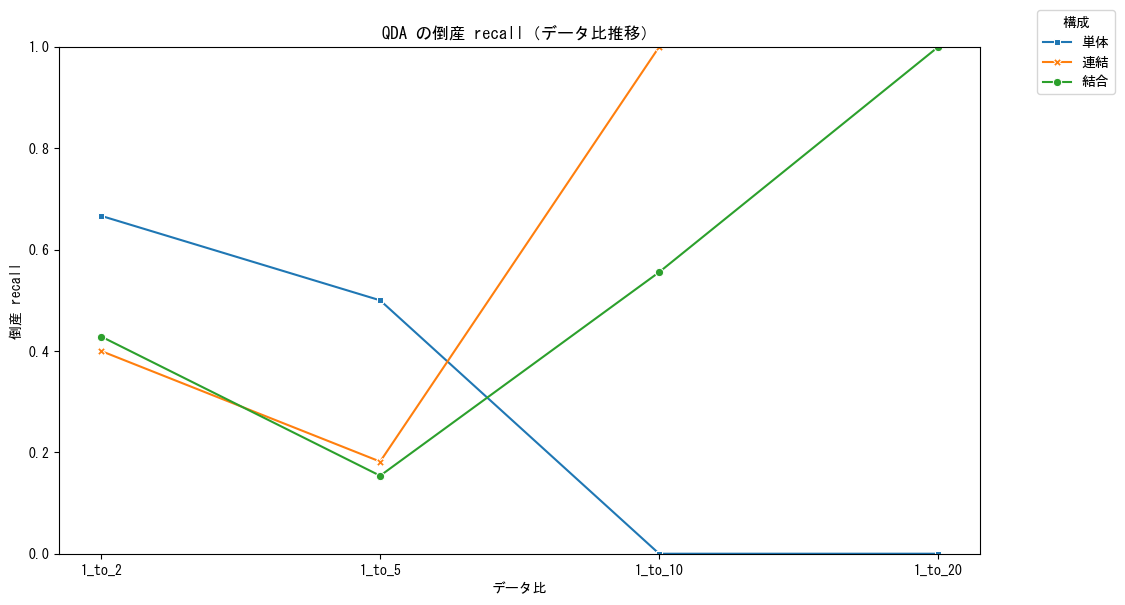

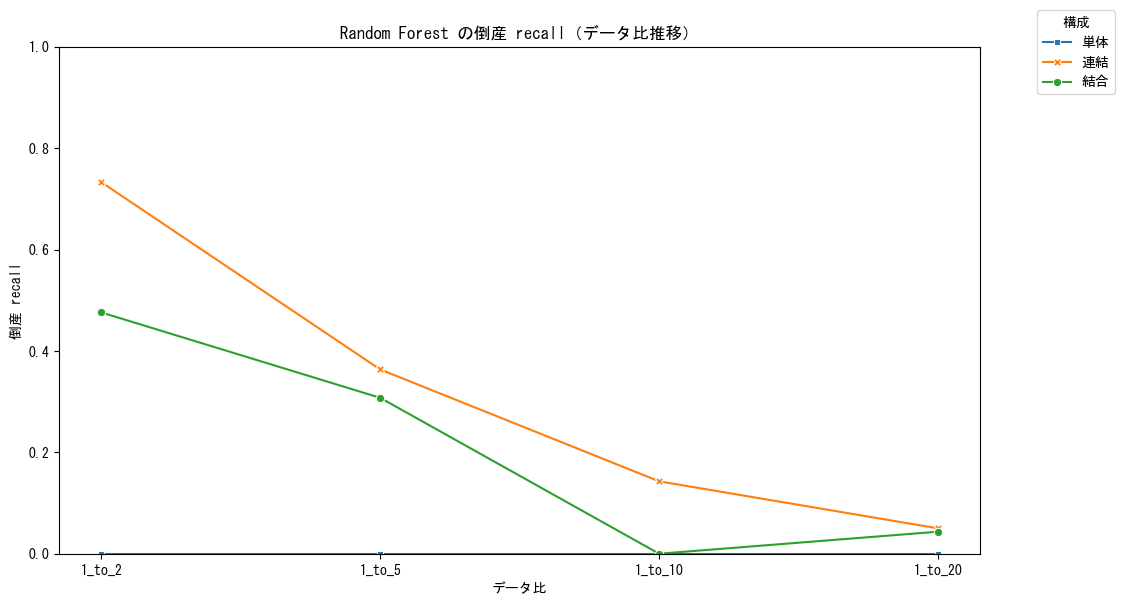

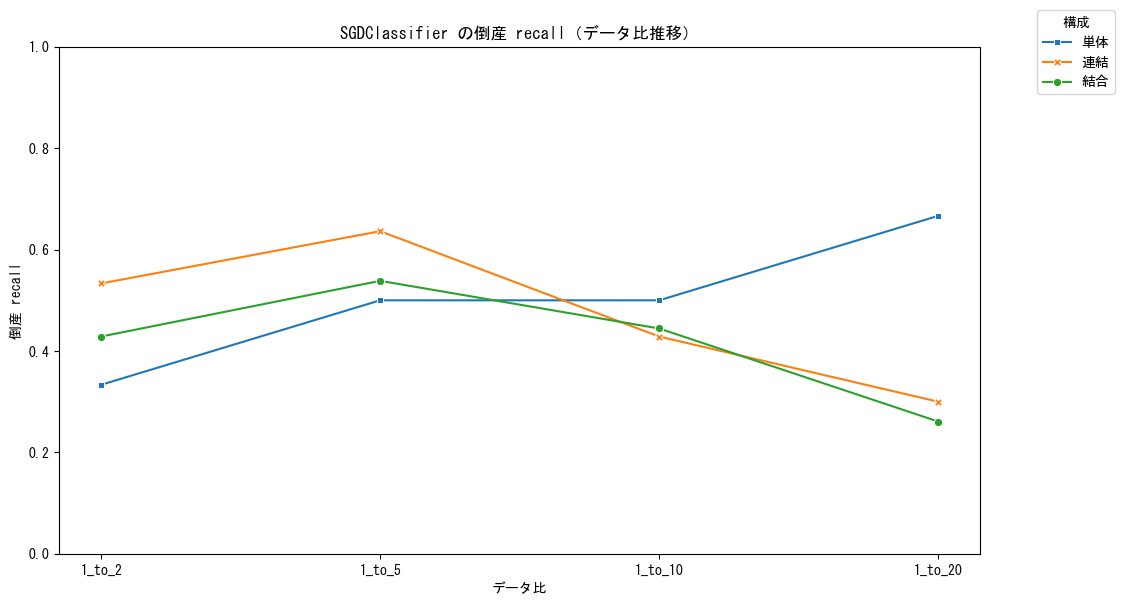

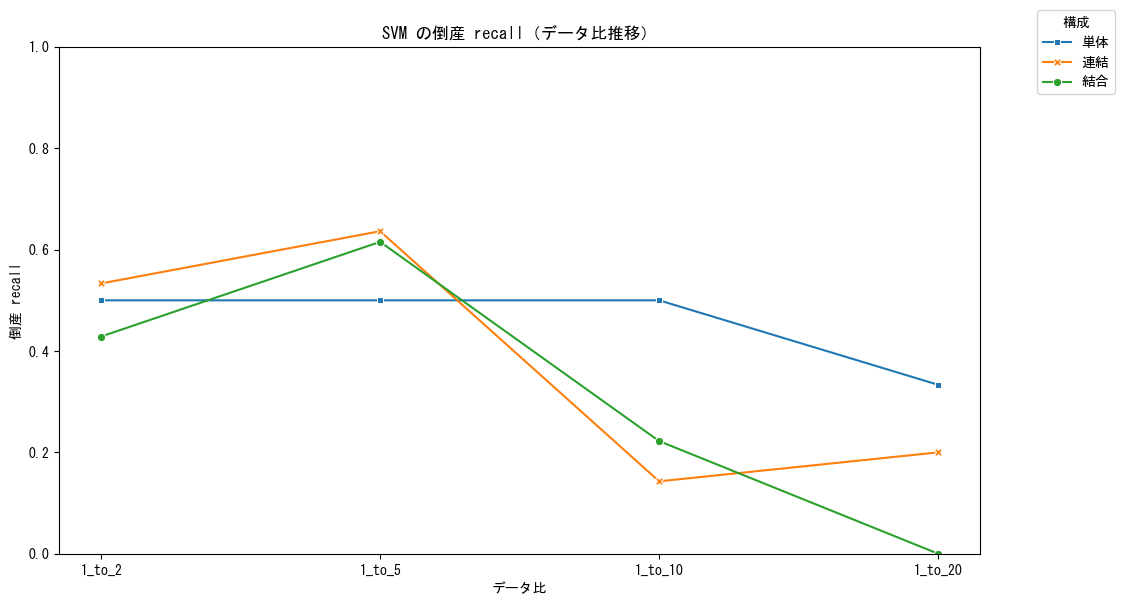

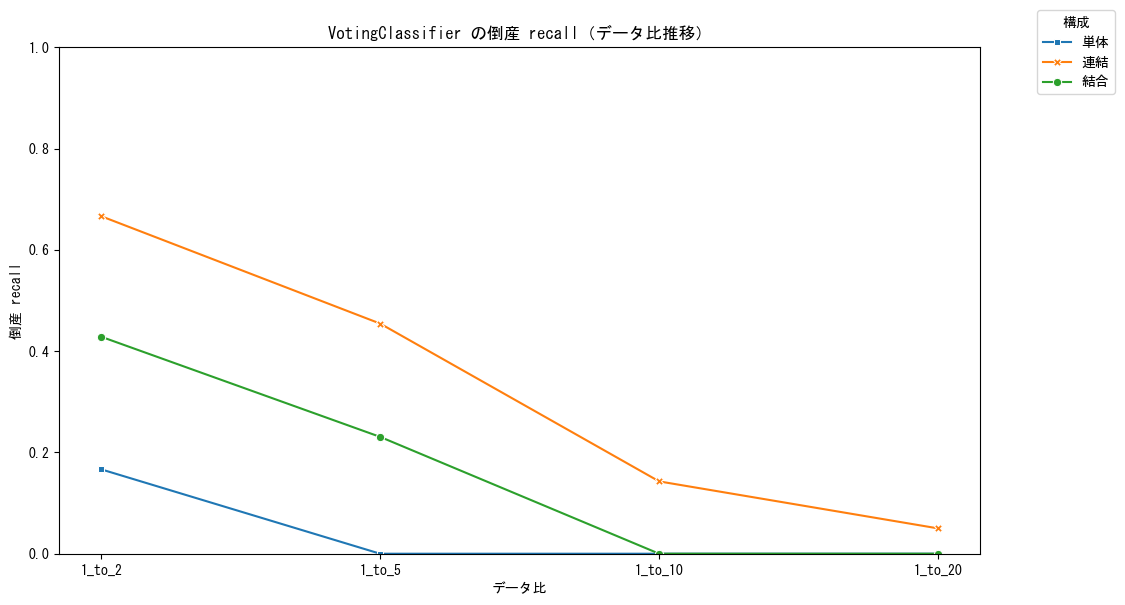

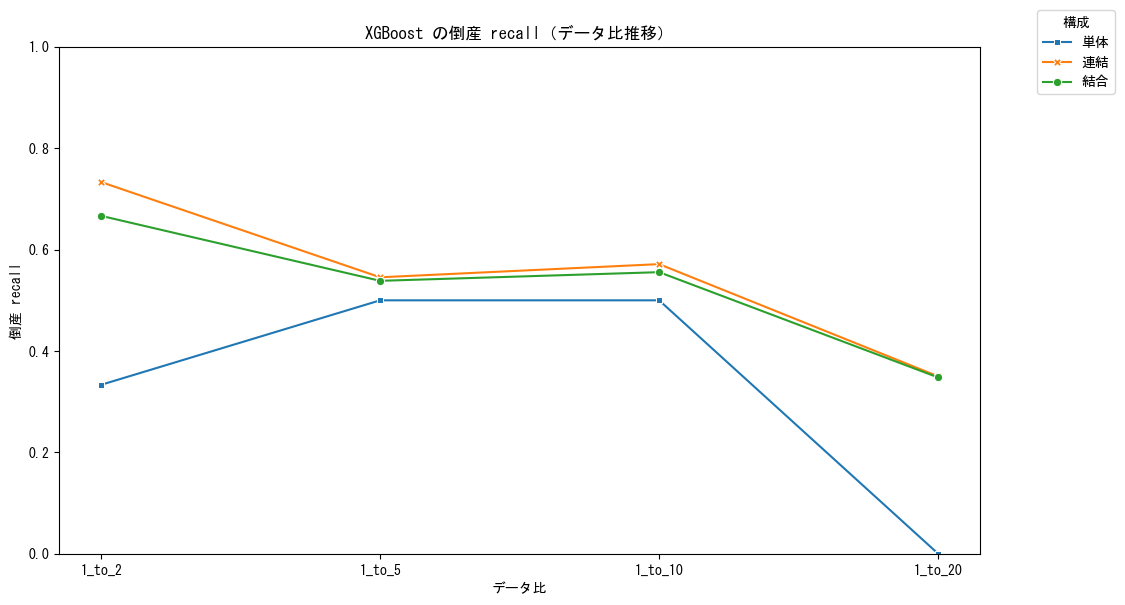

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォント設定
plt.rcParams['font.family'] = 'MS Gothic'

# データ読み込み
df = pd.read_csv("results_summary/全モデル評価結果_比率別まとめ.csv", encoding='utf-8-sig')

# インデックスを列に戻す
if '項目' not in df.columns:
    df.reset_index(inplace=True)

# melt処理
metrics = ['precision', 'recall', 'f1-score']
df_melted = df.melt(
    id_vars=['モデル', 'データ比', '構成', '項目'],
    value_vars=metrics,
    var_name='メトリック',
    value_name='値'
)

# 倒産の recall に絞る
subset = df_melted[
    (df_melted['項目'] == '倒産') &
    (df_melted['メトリック'] == 'recall')
].copy()

# データ比の表示順序を自然順にソート
from natsort import natsorted
subset['データ比'] = pd.Categorical(subset['データ比'], categories=natsorted(subset['データ比'].unique()), ordered=True)

# 全モデル一覧
all_models = sorted(subset['モデル'].unique())
構成順 = ['単体', '連結', '結合']

# モデルごとに折れ線グラフを作成
for model in all_models:
    plot_data = subset[subset['モデル'] == model]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(
        data=plot_data,
        x='データ比',
        y='値',
        hue='構成',
        hue_order=構成順,
        style='構成',
        markers=True,
        dashes=False,
        ax=ax
    )

    ax.set_title(f"{model} の倒産 recall（データ比推移）")
    ax.set_ylabel("倒産 recall")
    ax.set_ylim(0, 1)
    ax.set_xlabel("データ比")
    # 凡例が存在する場合のみ削除
    legend = ax.get_legend()
    if legend:
        legend.remove()

    # 外側に凡例を表示
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels, title='構成',
        loc='upper right', bbox_to_anchor=(1.12, 1), borderaxespad=0
    )

    plt.tight_layout()
    save_path = f"recall_transition_{model}.png"
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()


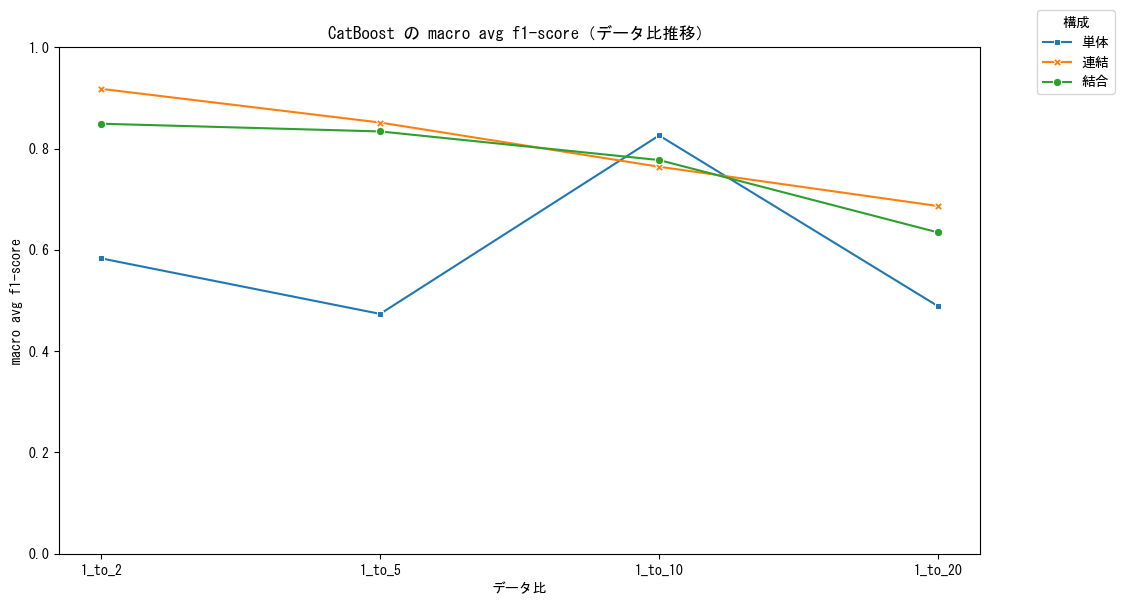

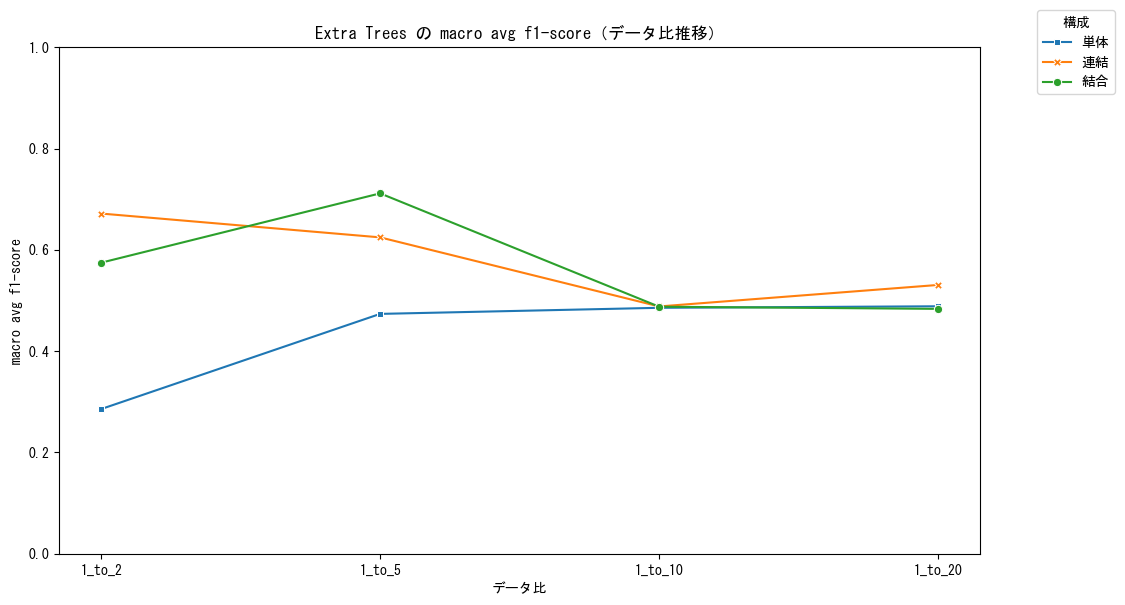

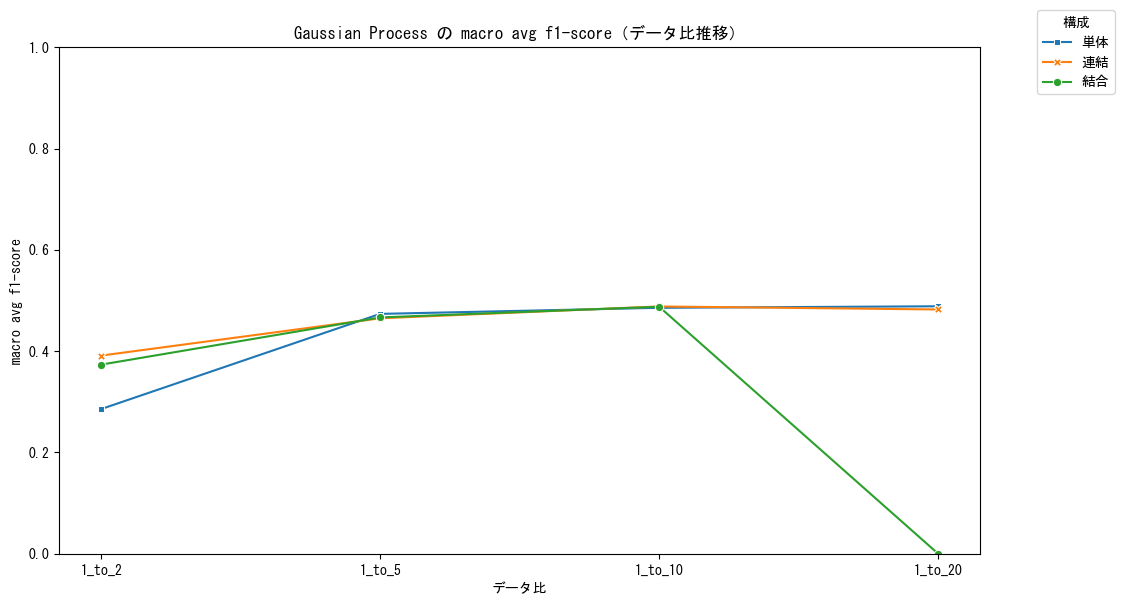

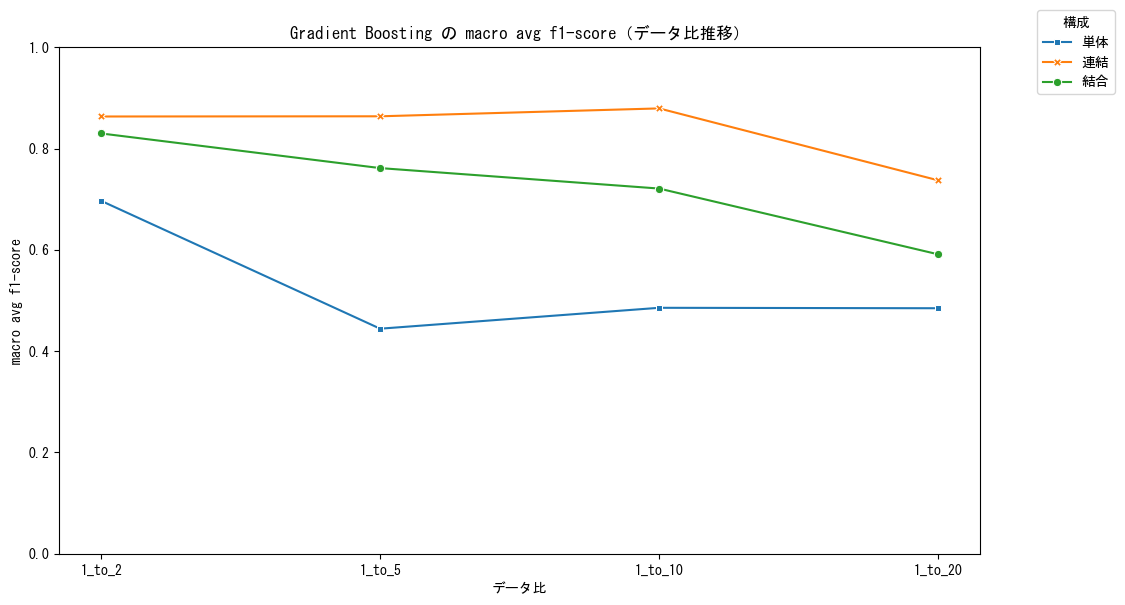

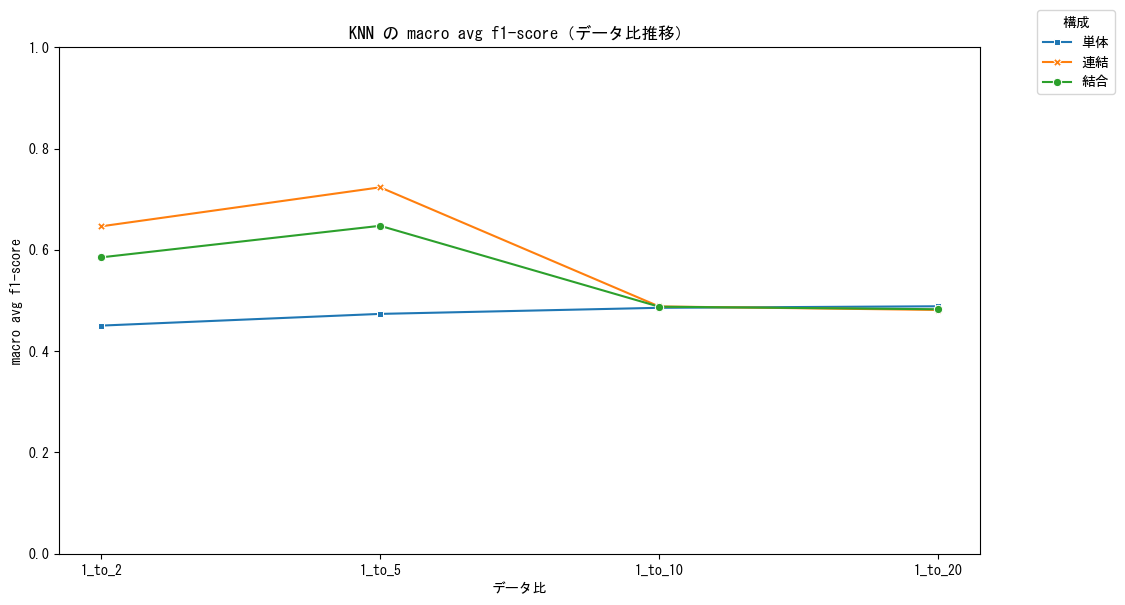

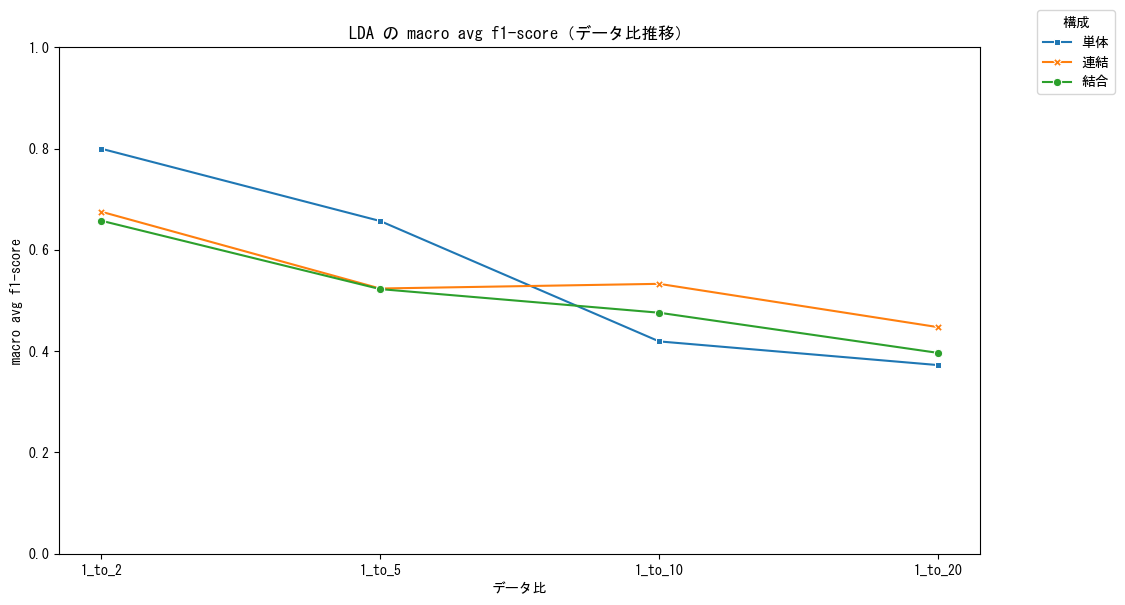

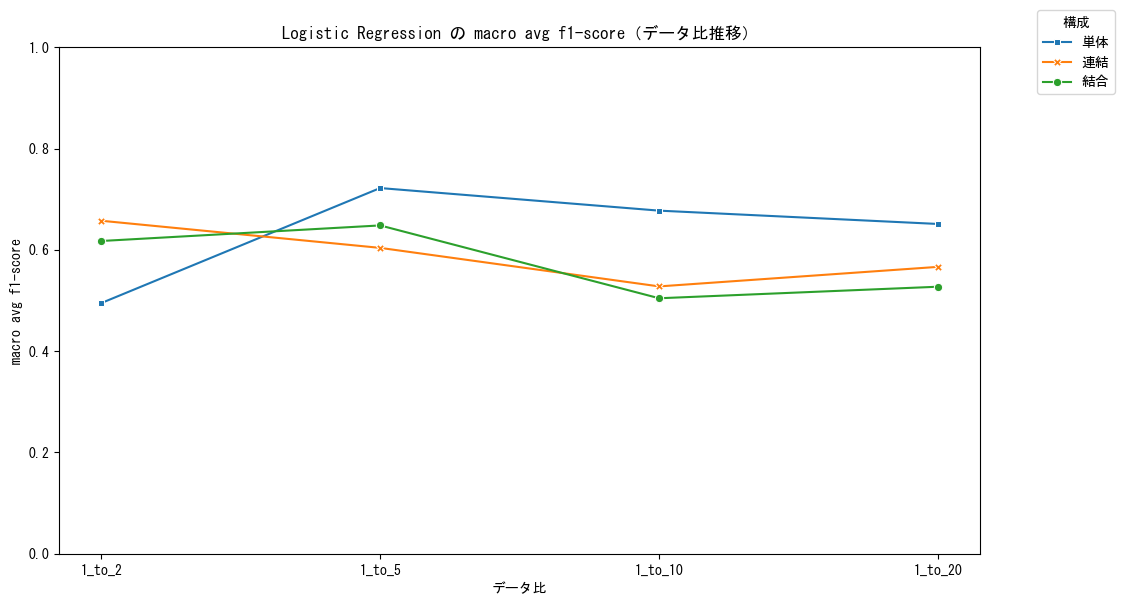

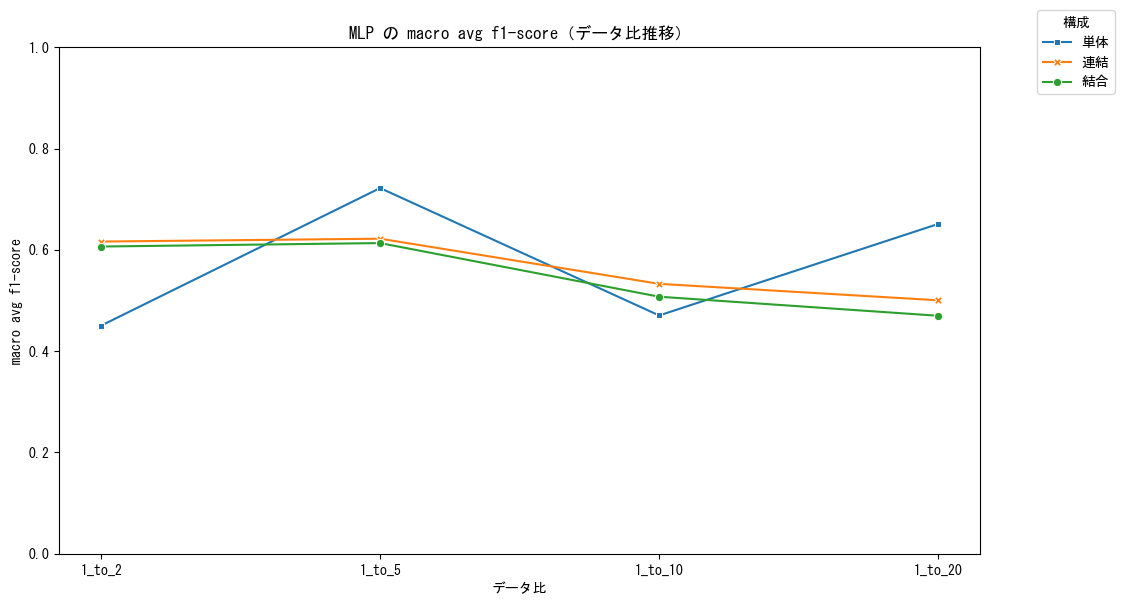

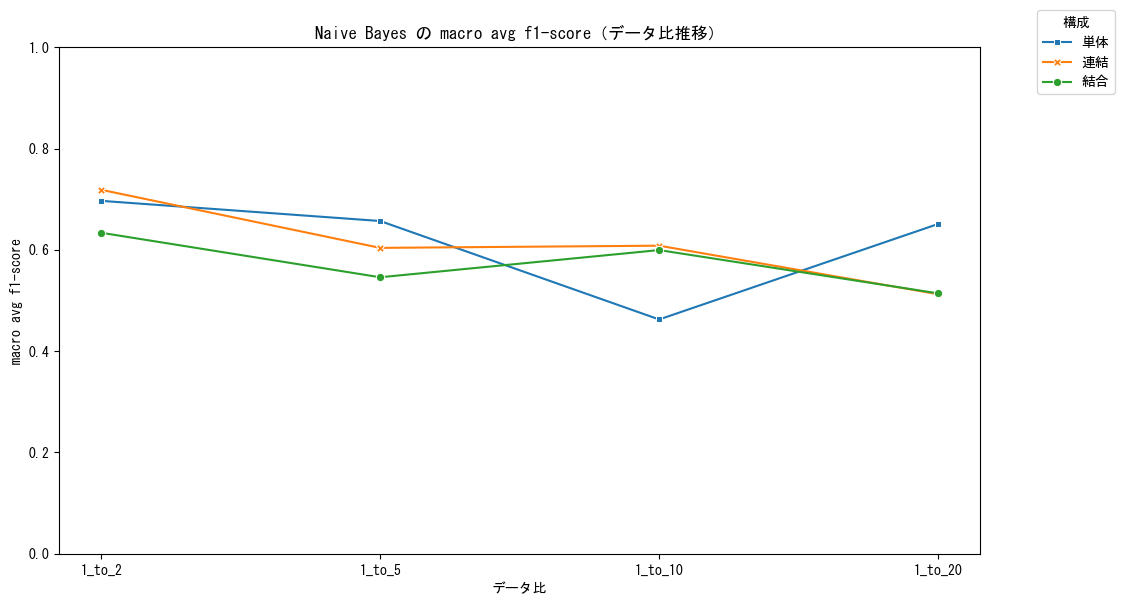

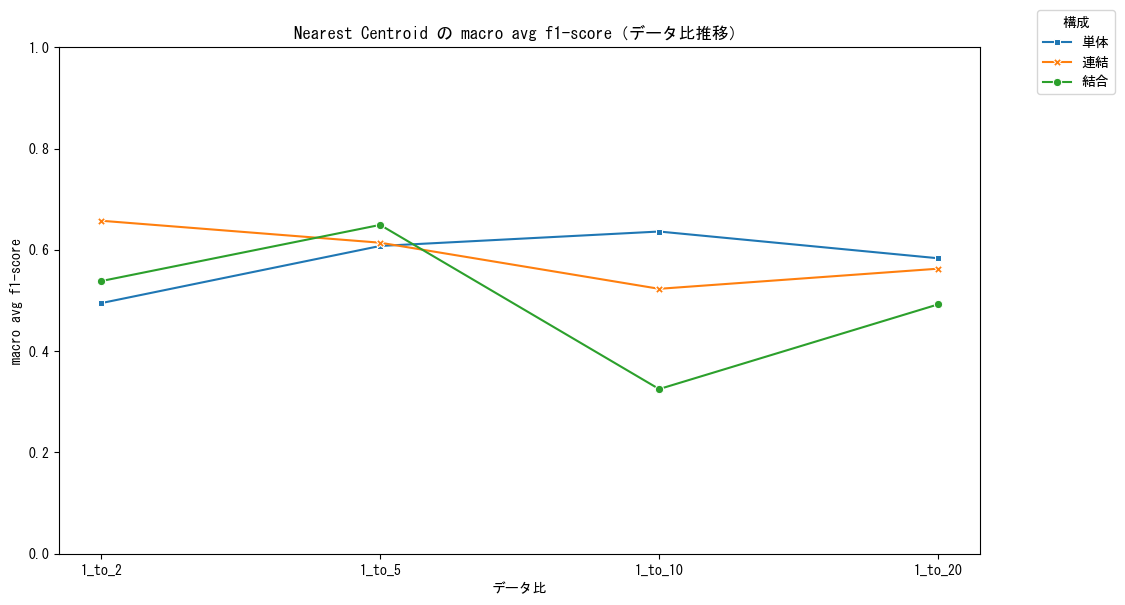

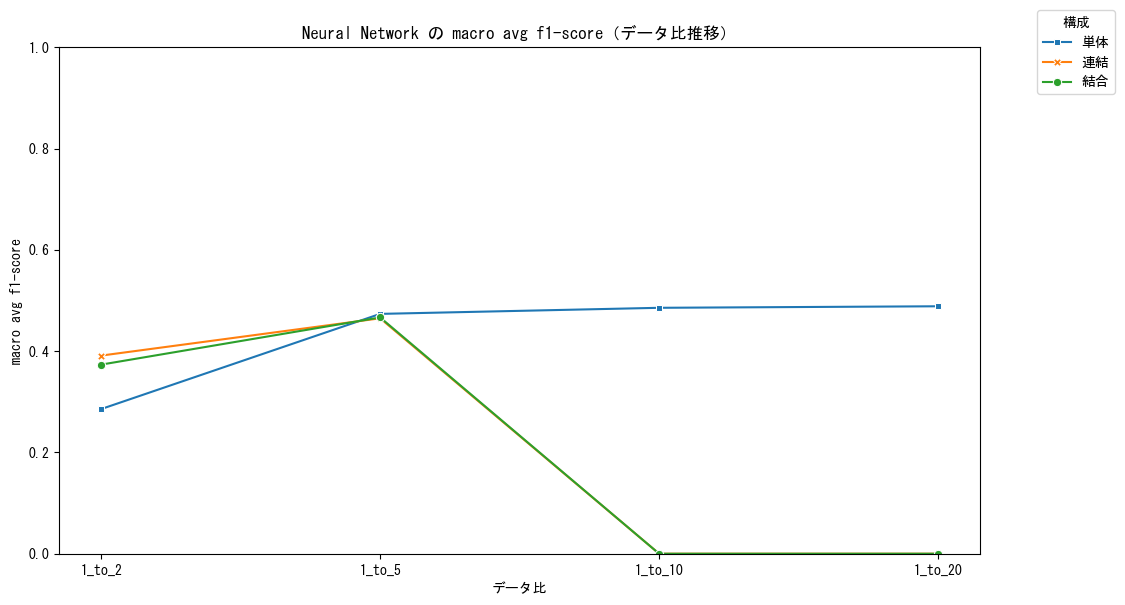

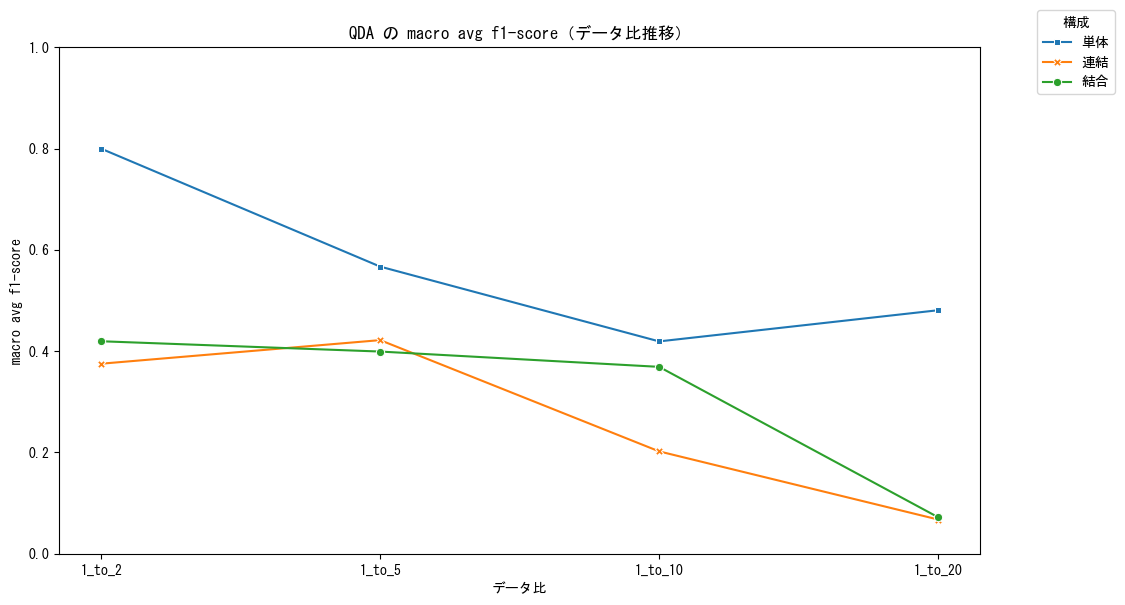

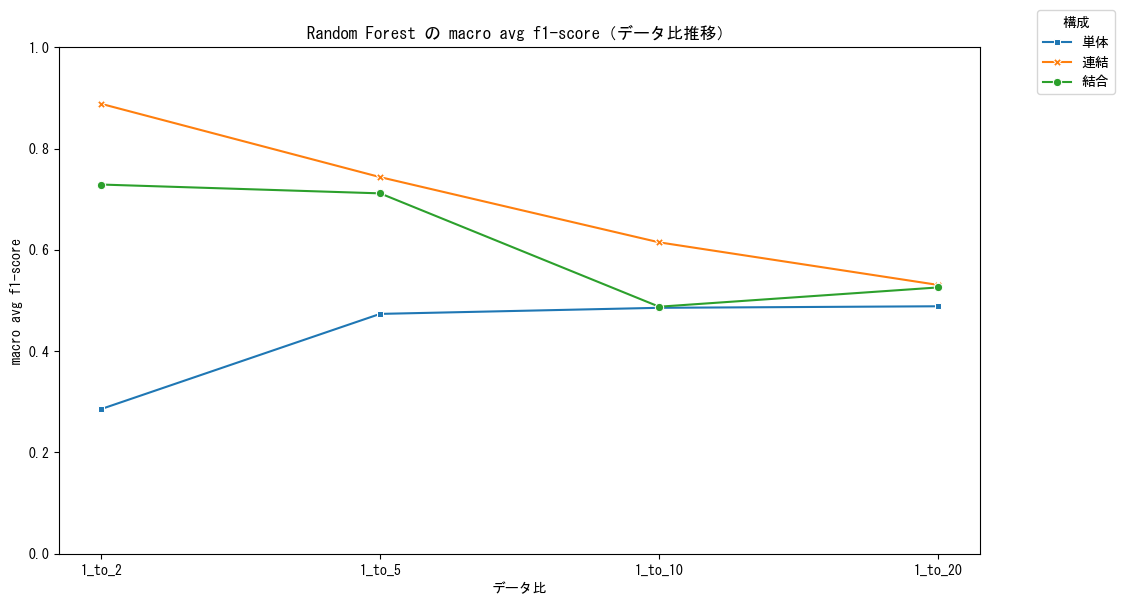

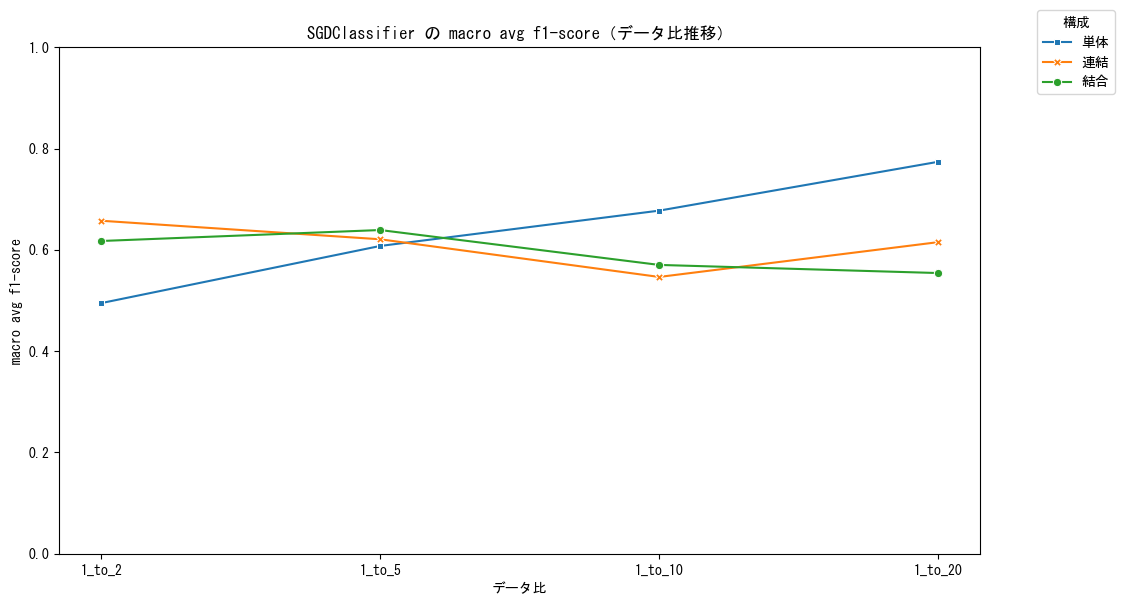

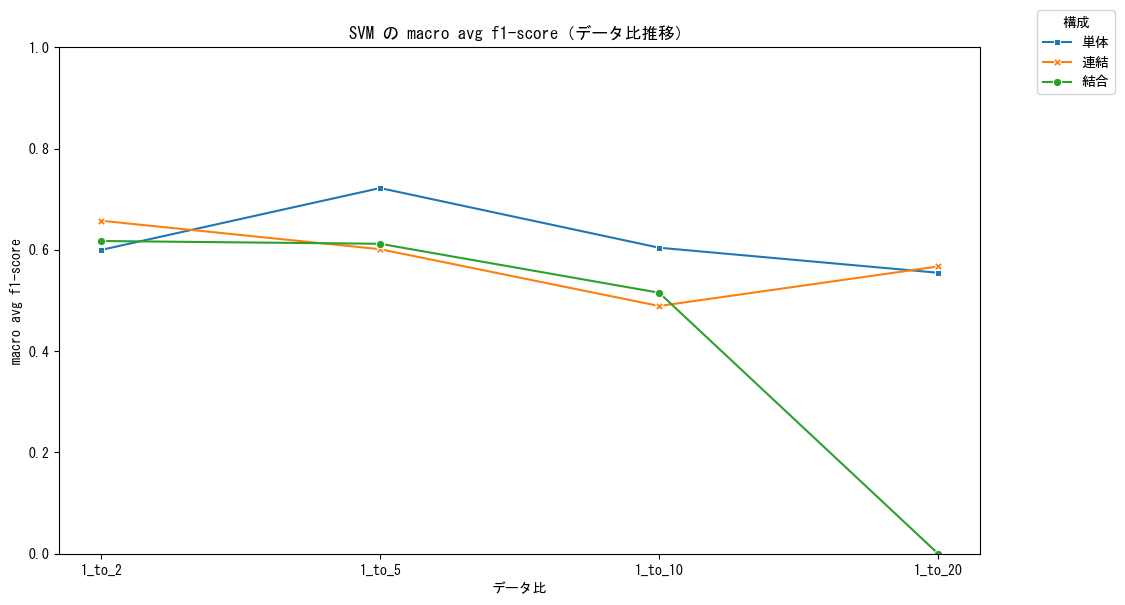

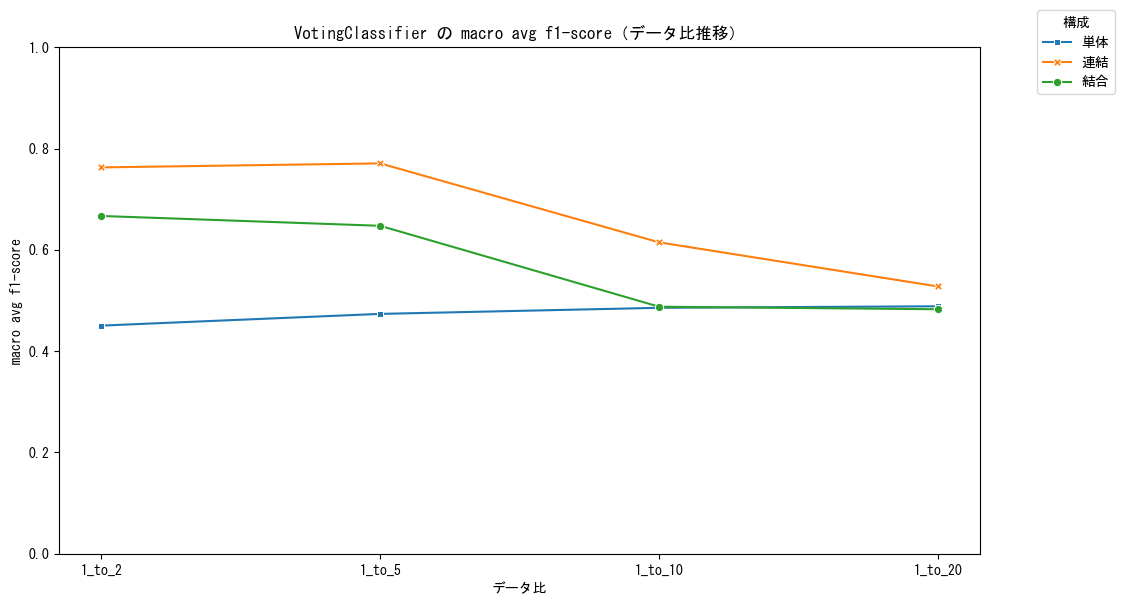

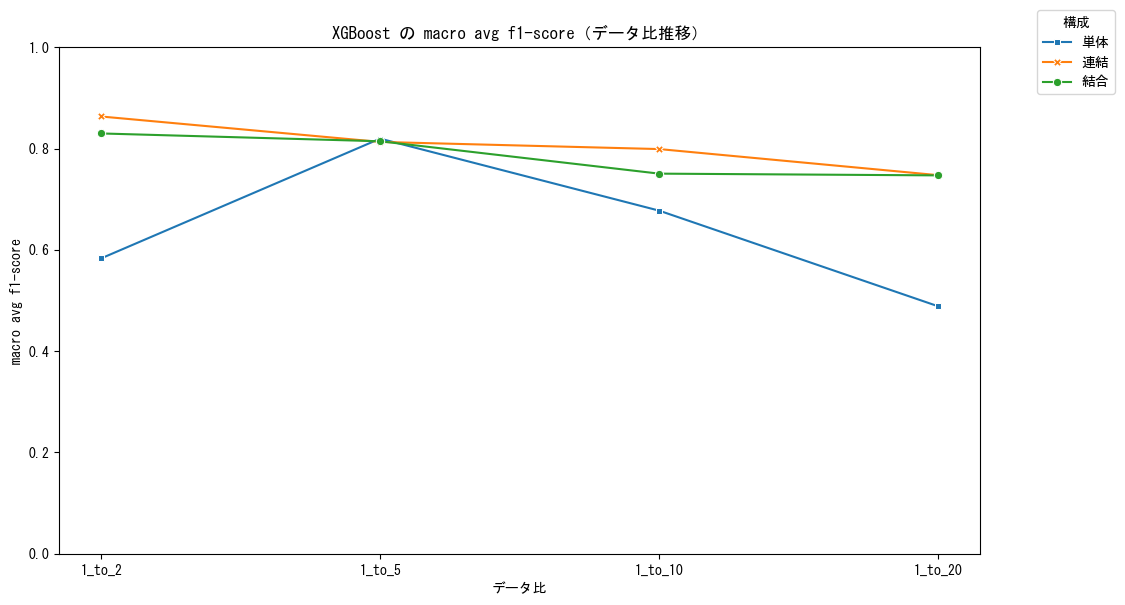

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted

# 日本語フォント設定
plt.rcParams['font.family'] = 'MS Gothic'

# データ読み込み
df = pd.read_csv("results_summary/全モデル評価結果_比率別まとめ.csv", encoding='utf-8-sig')

# インデックスを列に戻す
if '項目' not in df.columns:
    df.reset_index(inplace=True)

# melt処理
metrics = ['precision', 'recall', 'f1-score']
df_melted = df.melt(
    id_vars=['モデル', 'データ比', '構成', '項目'],
    value_vars=metrics,
    var_name='メトリック',
    value_name='値'
)

# macro avg の f1-score に絞る
subset = df_melted[
    (df_melted['項目'] == 'macro avg') &
    (df_melted['メトリック'] == 'f1-score')
].copy()

# データ比の表示順序を自然順にソート
subset['データ比'] = pd.Categorical(subset['データ比'], categories=natsorted(subset['データ比'].unique()), ordered=True)

# 全モデル一覧と構成順
all_models = sorted(subset['モデル'].unique())
構成順 = ['単体', '連結', '結合']

# モデルごとに折れ線グラフを作成
for model in all_models:
    plot_data = subset[subset['モデル'] == model]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(
        data=plot_data,
        x='データ比',
        y='値',
        hue='構成',
        hue_order=構成順,
        style='構成',
        markers=True,
        dashes=False,
        ax=ax
    )

    ax.set_title(f"{model} の macro avg f1-score（データ比推移）")
    ax.set_ylabel("macro avg f1-score")
    ax.set_ylim(0, 1)
    ax.set_xlabel("データ比")

    # 凡例が存在する場合のみ削除
    legend = ax.get_legend()
    if legend:
        legend.remove()

    # 外側に凡例を表示
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels, title='構成',
        loc='upper right', bbox_to_anchor=(1.12, 1), borderaxespad=0
    )

    plt.tight_layout()
    save_path = f"macro_avg_f1score_transition_{model}.png"
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()


In [71]:
df

,項目,precision,recall,f1-score,support,accuracy,構成,モデル,データ比
0,非倒産,0.967914,1.000000,0.983696,181.000000,0.968421,結合,CatBoost,1_to_10
1,倒産,1.000000,0.333333,0.500000,9.000000,0.968421,結合,CatBoost,1_to_10
2,accuracy,0.968421,0.968421,0.968421,0.968421,0.968421,結合,CatBoost,1_to_10
3,macro avg,0.983957,0.666667,0.741848,190.000000,0.968421,結合,CatBoost,1_to_10
4,weighted avg,0.969434,0.968421,0.960784,190.000000,0.968421,結合,CatBoost,1_to_10
...,...,...,...,...,...,...,...,...,...
1015,非倒産,0.947368,1.000000,0.972973,18.000000,0.950000,単体,XGBoost,1_to_5
1016,倒産,1.000000,0.500000,0.666667,2.000000,0.950000,単体,XGBoost,1_to_5
1017,accuracy,0.950000,0.950000,0.950000,0.950000,0.950000,単体,XGBoost,1_to_5
1018,macro avg,0.973684,0.750000,0.819820,20.000000,0.950000,単体,XGBoost,1_to_5
